In [1]:
# Set parameters

params = {
        'indiv_len': 8,
        'pop_size': 8,     # Has to be even
        'num_parents':8,   # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,
        'max_gen': 10
    }

In [2]:
from ga import *
from p1 import *

In [3]:
# DEMO init_pop()

algorithm = GA(params, fitness=sine_fitness)
pop = algorithm.init_pop()
print(pop)

['11011111', '01110110', '11111100', '11101001', '01000101', '01011110', '11110010', '10101100']


In [4]:
# DEMO select_parents()

parents = algorithm.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Weights used to select parents based on normalized fitness:
 [4.42092993e-05 2.05481416e-01 1.66971377e-01 9.31385071e-02
 1.32760420e-01 1.41057027e-01 2.50937769e-01 9.60927567e-03]

Parents selcted to make offsprings:
 ['01110110', '11110010', '11111100', '11111100', '01011110', '11110010', '01000101', '01000101']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['11110', '00001', '10000', '01111', '10000', '01111', '10000', '01111']

Mutation:
 ['11111', '00100', '11101', '00000', '11111', '00000', '11101', '00000']


A new generation:
 ['10000', '01111', '10010', '01111', '11000', '01111', '10000', '01111']


## DEMO GA: Sine [0, 128]

In [6]:
# DEMO run(), the complete GA with sine fitness function

params = {
        'indiv_len': 10,
        'pop_size': 8,     # Has to be even
        'num_parents':8,
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,
        'max_gen': 10
    }
algorithm = GA(params, fitness=sine_fitness)
pop, eval_log = algorithm.run()


Weights used to select parents based on normalized fitness:
 [0.09669572 0.14812956 0.17822772 0.13002854 0.11181885 0.05842367
 0.18403419 0.09264174]

Weights used to select parents based on normalized fitness:
 [1.80399133e-01 1.97908907e-01 8.22023472e-06 4.94880740e-03
 1.67033462e-01 1.17567337e-01 2.53346599e-01 7.87875331e-02]

Weights used to select parents based on normalized fitness:
 [0.23827566 0.03017175 0.26513493 0.03017175 0.00720211 0.05574426
 0.0874283  0.28587125]

Weights used to select parents based on normalized fitness:
 [0.11498428 0.08523114 0.16509933 0.16996713 0.02423989 0.15312347
 0.11498428 0.17237048]

Weights used to select parents based on normalized fitness:
 [0.13538271 0.13663447 0.13831181 0.15166433 0.10688402 0.05558022
 0.15166433 0.1238781 ]

Weights used to select parents based on normalized fitness:
 [0.1332651  0.01547929 0.14400957 0.09022594 0.1320976  0.1568173
 0.16315687 0.16494833]

Weights used to select parents based on normalized

In [7]:
print(pop)

[print(key, ':\n', value[0], ':\n', value[1], ':\n') for key, value in eval_log.items()]

['0100000111', '0100000110', '0100000010', '0100000011', '0100000010', '0101001010', '0001000010', '0100000010']
0 :
 [ 50.125  84.5     0.625  53.25  119.375  47.625  59.     85.   ] :
 [-0.1400208354566184, 0.31741440880766936, 0.5850972729404622, 0.15642999905467883, -0.005520808366672965, -0.48039953173383443, 0.6367380071391379, -0.1760756199485871] :

1 :
 [ 65.625  21.5    61.25   55.25  119.625  47.25   32.5    85.25 ] :
 [0.34143735070135944, 0.47163900309419615, -0.9999388748177166, -0.9632009590319782, 0.24205100906859667, -0.12577619035921253, 0.8838704235458307, -0.4141405343019522] :

2 :
 [96.75  55.625 96.5   55.625 23.25  85.5   85.25  52.25 ] :
 [0.5966918171697799, -0.7978182693804976, 0.7766764881502719, -0.7978182693804976, -0.9517384599623535, -0.6264561960895026, -0.4141405343019522, 0.9156311650396451] :

3 :
 [ 40.5   116.25   52.25   32.75   85.625  96.5    40.5    83.25 ] :
 [0.33415117684842055, -0.011071590972334946, 0.9156311650396451, 0.9721117417027341, 

[None, None, None, None, None, None, None, None, None, None, None]

<IPython.core.display.Javascript object>


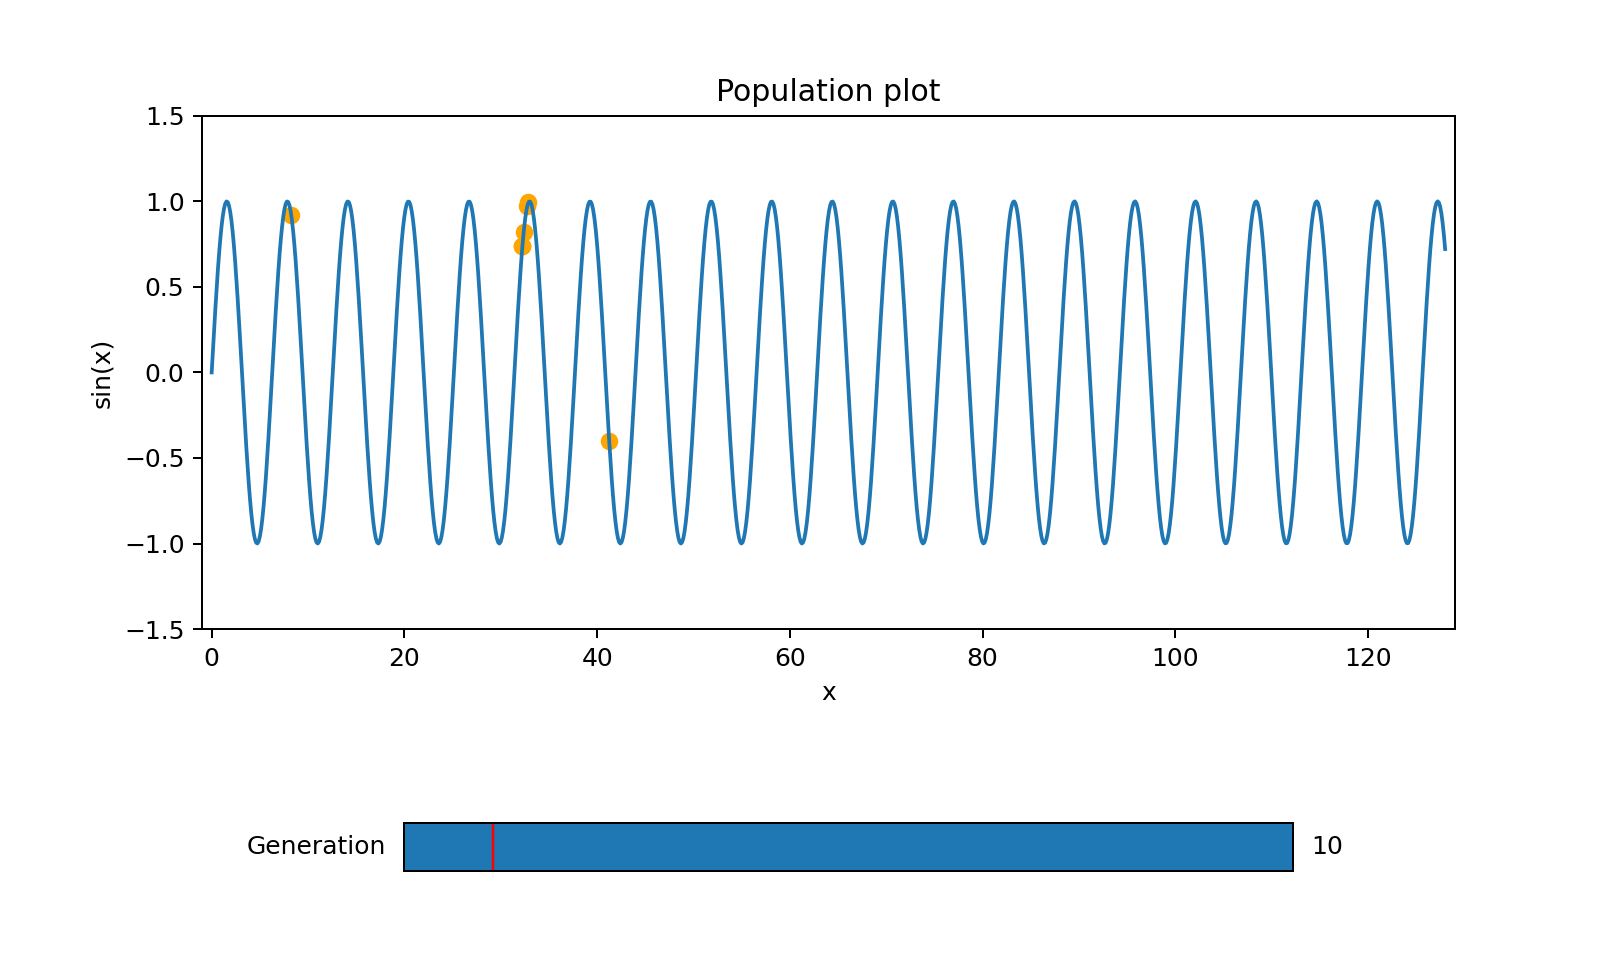

0

In [10]:
# Plot the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = eval_log[i][0]
y = eval_log[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[eval_log[gen][0], eval_log[gen][1]])

generation.on_changed(update)


#[print(pop) for pop in ]
